In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
from utils.discrete import *
import ot

/tmp/ipykernel_2787857/2765114746.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_2787857/2765114746.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_2787857/2765114746.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


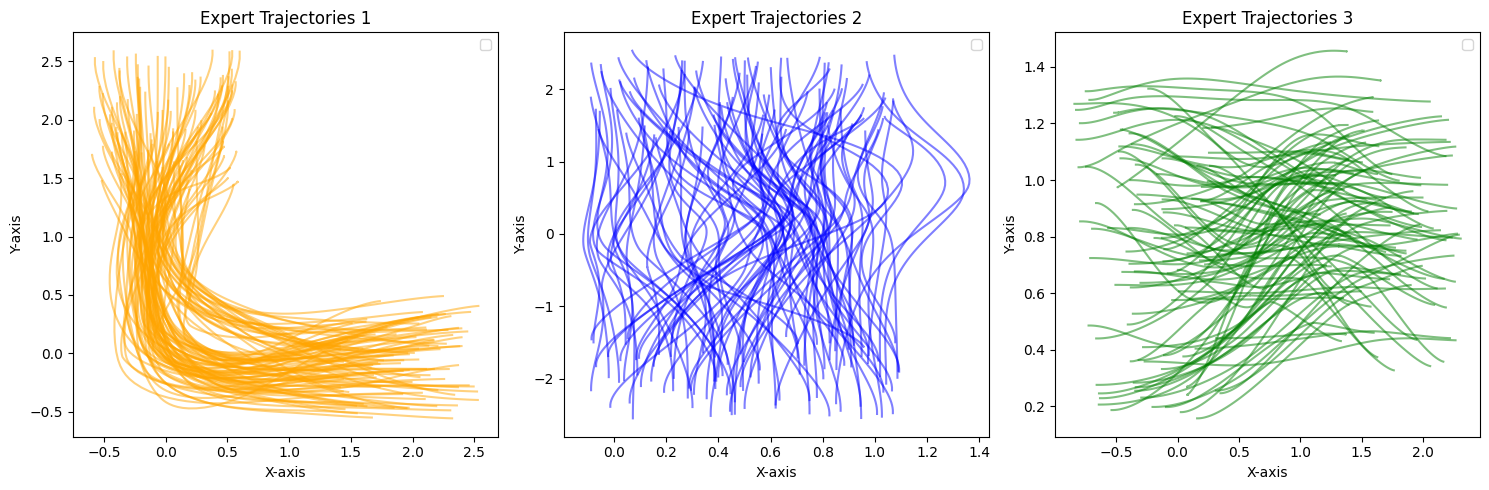

In [3]:
# Loading training trajectories
expert_data1 = np.load('data/expert_data1_400_traj_06_noise.npy')  # (n_traj, horizon, 2)
expert_data2 = np.load('data/expert_data2_400_traj_06_noise.npy')
expert_data3 = np.load('data/expert_data3_400_traj_06_noise.npy')

num_trajectories = 400
points_per_trajectory = 100
n_traj = 100

# randomly select 10 trajectories from the expert data
indices = np.random.choice(num_trajectories, size=n_traj, replace=False)
expert_data1 = expert_data1[indices]
expert_data2 = expert_data2[indices]
expert_data3 = expert_data3[indices]

# Plotting the trajectories
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Expert Trajectories 1")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
for trajectory in expert_data1:
    plt.plot([point[0] for point in trajectory], [point[1] for point in trajectory], alpha=0.5, color='orange')
# plt.scatter(x1, y1, color='red', label='First Trajectory')
plt.legend()
plt.subplot(1, 3, 2)
plt.title("Expert Trajectories 2")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
for trajectory in expert_data2:
    plt.plot([point[0] for point in trajectory], [point[1] for point in trajectory], alpha=0.5, color='blue')
# plt.scatter(x2, y2, color='red', label='First Trajectory')
plt.legend()
plt.subplot(1, 3, 3)
plt.title("Expert Trajectories 3")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
for trajectory in expert_data3:
    plt.plot([point[0] for point in trajectory], [point[1] for point in trajectory], alpha=0.5, color='green')
# plt.scatter(x3, y3, color='red', label='First Trajectory')
plt.legend()
plt.tight_layout()

In [3]:
# load the diffusion data and mlp data

load_path_ours = "sampled_trajs/mpc_P25E1_400demos_06demonoise_finalposcond_06samplenoise_200N_vettedinitfinal"
load_path_vanilla = "sampled_trajs/mpc_P25E1_400demos_06demonoise_06samplenoise_200N_vettedinitfinal_vanillaCTDE"
load_path_magail_vary_init = "sampled_trajs/magail_ctde/vary_init"
load_path_magail_static_init = "sampled_trajs/magail_ctde/static_init"
load_path_bc = "sampled_trajs/bc"

ours1 = []
ours2 = []
ours3 = []
vanilla1 = []
vanilla2 = []
vanilla3 = []
magail_vary_init1 = []
magail_vary_init2 = []
magail_vary_init3 = []
magail_static_init1 = []
magail_static_init2 = []
magail_static_init3 = []
bc1 = []
bc2 = []
bc3 = []

for i in range(n_traj):
    ours1.append(np.load(load_path_ours + "/" + f"traj1_{i}.npy"))
    ours2.append(np.load(load_path_ours + "/" + f"traj2_{i}.npy"))
    ours3.append(np.load(load_path_ours + "/" + f"traj3_{i}.npy"))
    vanilla1.append(np.load(load_path_vanilla + "/" + f"traj1_{i}.npy"))
    vanilla2.append(np.load(load_path_vanilla + "/" + f"traj2_{i}.npy"))
    vanilla3.append(np.load(load_path_vanilla + "/" + f"traj3_{i}.npy"))
    magail_vary_init1.append(np.load(load_path_magail_vary_init + "/" + f"traj1_{i}.npy"))
    magail_vary_init2.append(np.load(load_path_magail_vary_init + "/" + f"traj2_{i}.npy"))
    magail_vary_init3.append(np.load(load_path_magail_vary_init + "/" + f"traj3_{i}.npy"))
    magail_static_init1.append(np.load(load_path_magail_static_init + "/" + f"traj1_{i}.npy"))
    magail_static_init2.append(np.load(load_path_magail_static_init + "/" + f"traj2_{i}.npy"))
    magail_static_init3.append(np.load(load_path_magail_static_init + "/" + f"traj3_{i}.npy"))
    bc1.append(np.load(load_path_bc + "/" + f"traj1_{i}.npy"))
    bc2.append(np.load(load_path_bc + "/" + f"traj2_{i}.npy"))
    bc3.append(np.load(load_path_bc + "/" + f"traj3_{i}.npy"))

ours1 = np.array(ours1)
ours2 = np.array(ours2)
ours3 = np.array(ours3)
vanilla1 = np.array(vanilla1)
vanilla2 = np.array(vanilla2)
vanilla3 = np.array(vanilla3)
magail_vary_init1 = np.array(magail_vary_init1)
magail_vary_init2 = np.array(magail_vary_init2)
magail_vary_init3 = np.array(magail_vary_init3)
magail_static_init1 = np.array(magail_static_init1)
magail_static_init2 = np.array(magail_static_init2)
magail_static_init3 = np.array(magail_static_init3)
bc1 = np.array(bc1)
bc2 = np.array(bc2)
bc3 = np.array(bc3)

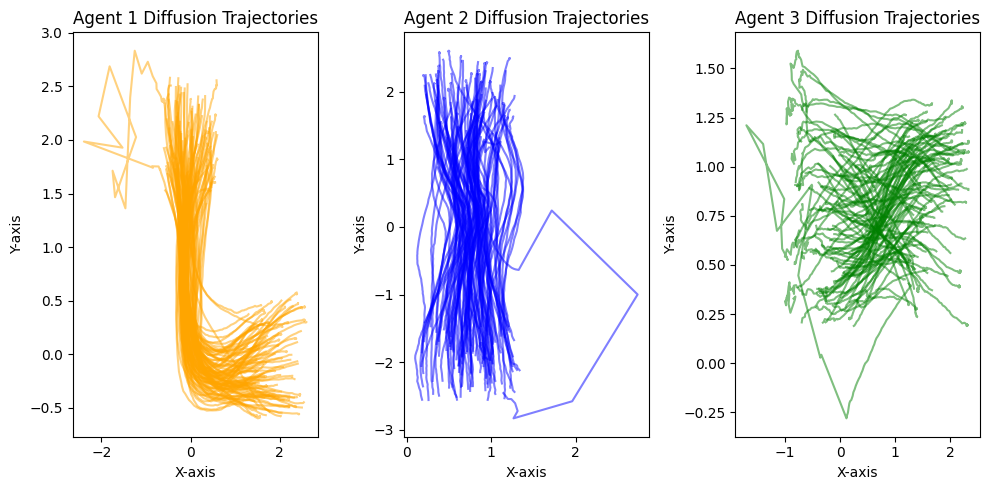

In [4]:
# Plotting diffusion trajectories

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Agent 1 Diffusion Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# for trajectory in mlp_gnn_data1:
#     plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
for trajectory in ours1:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
# plt.scatter(x1, y1, color='red', label='First Trajectory')

plt.subplot(1, 3, 2)
plt.title("Agent 2 Diffusion Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# for trajectory in mlp_gnn_data2:
#     plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
for trajectory in ours2:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='blue')
# plt.scatter(x2, y2, color='red', label='First Trajectory')

plt.subplot(1, 3, 3)
plt.title("Agent 3 Diffusion Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
for trajectory in ours3:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='green')

plt.tight_layout()

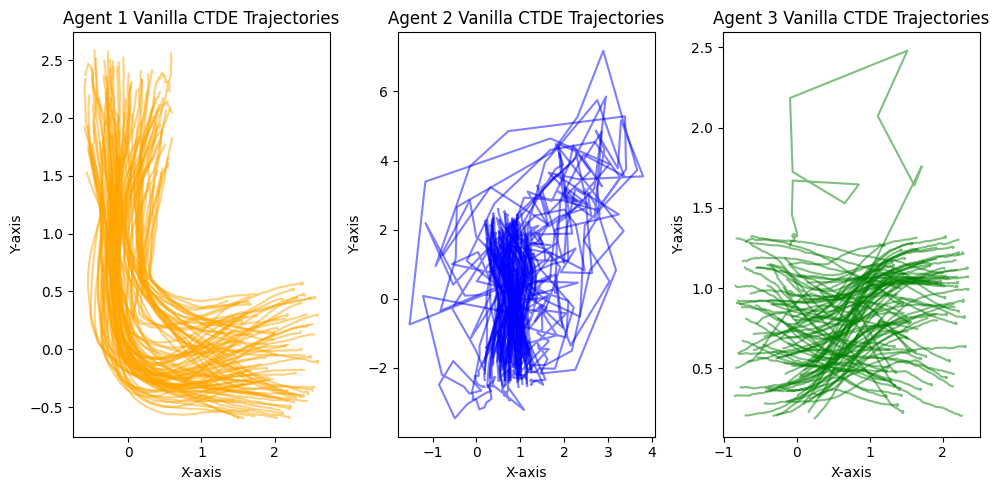

In [5]:
# Plotting vanilla CTDE trajectories

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Agent 1 Vanilla CTDE Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

for trajectory in vanilla1:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')

plt.subplot(1, 3, 2)
plt.title("Agent 2 Vanilla CTDE Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
for trajectory in vanilla2:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='blue')

plt.subplot(1, 3, 3)
plt.title("Agent 3 Vanilla CTDE Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
for trajectory in vanilla3:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='green')

plt.tight_layout()

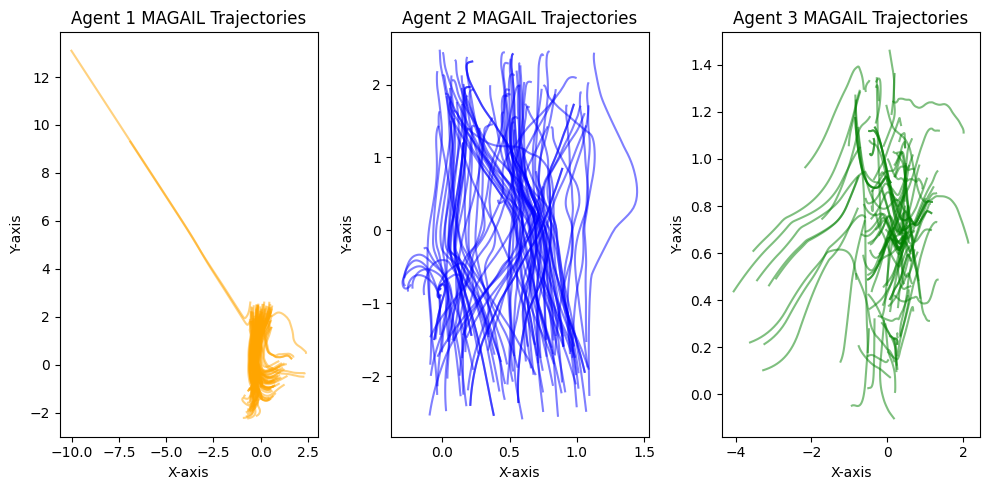

In [6]:
# Plotting magail trajectories

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Agent 1 MAGAIL Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# for trajectory in mlp_gnn_data1:
#     plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
for trajectory in magail_vary_init1:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
# plt.scatter(x1, y1, color='red', label='First Trajectory')

plt.subplot(1, 3, 2)
plt.title("Agent 2 MAGAIL Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# for trajectory in mlp_gnn_data2:
#     plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
for trajectory in magail_vary_init2:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='blue')
# plt.scatter(x2, y2, color='red', label='First Trajectory')

plt.subplot(1, 3, 3)
plt.title("Agent 3 MAGAIL Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
for trajectory in magail_vary_init3:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='green')

plt.tight_layout()

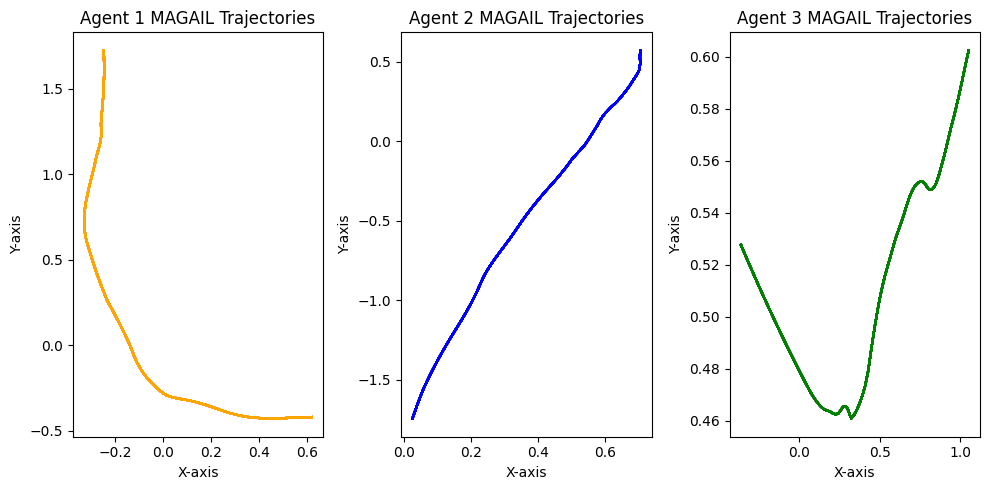

In [7]:
# Plotting magail trajectories

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Agent 1 MAGAIL Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# for trajectory in mlp_gnn_data1:
#     plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
for trajectory in magail_static_init1:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
# plt.scatter(x1, y1, color='red', label='First Trajectory')

plt.subplot(1, 3, 2)
plt.title("Agent 2 MAGAIL Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# for trajectory in mlp_gnn_data2:
#     plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
for trajectory in magail_static_init2:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='blue')
# plt.scatter(x2, y2, color='red', label='First Trajectory')

plt.subplot(1, 3, 3)
plt.title("Agent 3 MAGAIL Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
for trajectory in magail_static_init3:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='green')

plt.tight_layout()

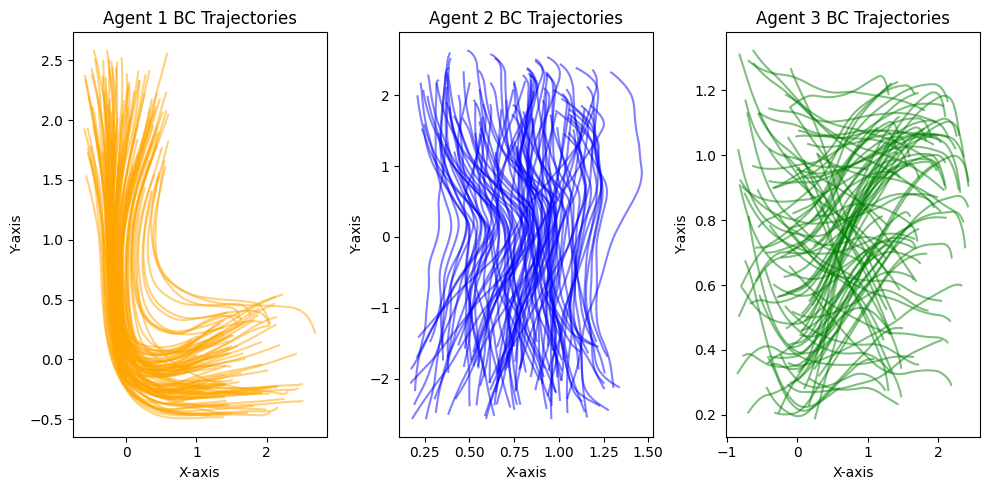

In [8]:
# Plotting bc trajectories

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Agent 1 BC Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# for trajectory in mlp_gnn_data1:
#     plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
for trajectory in bc1:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
# plt.scatter(x1, y1, color='red', label='First Trajectory')

plt.subplot(1, 3, 2)
plt.title("Agent 2 BC Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# for trajectory in mlp_gnn_data2:
#     plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
for trajectory in bc2:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='blue')
# plt.scatter(x2, y2, color='red', label='First Trajectory')

plt.subplot(1, 3, 3)
plt.title("Agent 3 BC Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
for trajectory in bc3:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='green')

plt.tight_layout()

In [9]:
fast_frechet = FastDiscreteFrechetMatrix(euclidean)
n = n_traj
w = np.ones(n) / n

# pack your expert & model trajectories into lists
expert = [expert_data1, expert_data2, expert_data3]
models = {
    "ours":       [ours1,       ours2,       ours3],
    "vanilla":    [vanilla1,    vanilla2,    vanilla3],
    "magail_var": [magail_vary_init1, magail_vary_init2, magail_vary_init3],
    "magail_stat":[magail_static_init1, magail_static_init2, magail_static_init3],
    "bc":         [bc1,         bc2,         bc3],
}

for name, trajs in models.items():
    for agent_idx in range(3):
        D = np.zeros((n, n))
        A_exp = expert[agent_idx]
        A_mod =  trajs[agent_idx]
        for i in range(n):
            for j in range(n):
                D[i,j] = fast_frechet.distance(A_exp[i], A_mod[j])
        ot_dist = ot.emd2(w, w, D)
        print(f"OT({name}) Agent-{agent_idx+1}: {ot_dist:.4f}")

OT(ours) Agent-1: 0.3335
OT(ours) Agent-2: 0.4020
OT(ours) Agent-3: 0.2810
OT(vanilla) Agent-1: 0.3269
OT(vanilla) Agent-2: 0.6212
OT(vanilla) Agent-3: 0.2904
OT(magail_var) Agent-1: 2.2124
OT(magail_var) Agent-2: 0.5961
OT(magail_var) Agent-3: 1.6595
OT(magail_stat) Agent-1: 1.4131
OT(magail_stat) Agent-2: 1.4443
OT(magail_stat) Agent-3: 0.8755
OT(bc) Agent-1: 0.4374
OT(bc) Agent-2: 0.3826
OT(bc) Agent-3: 0.2809


In [4]:
# load the diffusion data and mlp data

load_path_ours = "sampled_trajs/mpc_P25E1_400demos_06demonoise_06samplenoise_200N_vettedinitfinal_separatenorm_nofinalpos"
load_path_vanilla = "sampled_trajs/mpc_P25E1_400demos_06demonoise_06samplenoise_200N_vettedinitfinal_separatenorm_nofinalpos_vanillaCTDE"
load_path_magail_vary_init = "sampled_trajs/magail_ctde_nofinalpos/vary_init"
load_path_magail_static_init = "sampled_trajs/magail_ctde_nofinalpos/static_init"
load_path_bc = "sampled_trajs/bc_nofinalpos"

ours1 = []
ours2 = []
ours3 = []
vanilla1 = []
vanilla2 = []
vanilla3 = []
magail_vary_init1 = []
magail_vary_init2 = []
magail_vary_init3 = []
magail_static_init1 = []
magail_static_init2 = []
magail_static_init3 = []
bc1 = []
bc2 = []
bc3 = []

for i in range(n_traj):
    ours1.append(np.load(load_path_ours + "/" + f"traj1_{i}.npy"))
    ours2.append(np.load(load_path_ours + "/" + f"traj2_{i}.npy"))
    ours3.append(np.load(load_path_ours + "/" + f"traj3_{i}.npy"))
    vanilla1.append(np.load(load_path_vanilla + "/" + f"traj1_{i}.npy"))
    vanilla2.append(np.load(load_path_vanilla + "/" + f"traj2_{i}.npy"))
    vanilla3.append(np.load(load_path_vanilla + "/" + f"traj3_{i}.npy"))
    magail_vary_init1.append(np.load(load_path_magail_vary_init + "/" + f"traj1_{i}.npy"))
    magail_vary_init2.append(np.load(load_path_magail_vary_init + "/" + f"traj2_{i}.npy"))
    magail_vary_init3.append(np.load(load_path_magail_vary_init + "/" + f"traj3_{i}.npy"))
    magail_static_init1.append(np.load(load_path_magail_static_init + "/" + f"traj1_{i}.npy"))
    magail_static_init2.append(np.load(load_path_magail_static_init + "/" + f"traj2_{i}.npy"))
    magail_static_init3.append(np.load(load_path_magail_static_init + "/" + f"traj3_{i}.npy"))
    bc1.append(np.load(load_path_bc + "/" + f"traj1_{i}.npy"))
    bc2.append(np.load(load_path_bc + "/" + f"traj2_{i}.npy"))
    bc3.append(np.load(load_path_bc + "/" + f"traj3_{i}.npy"))

ours1 = np.array(ours1)
ours2 = np.array(ours2)
ours3 = np.array(ours3)
vanilla1 = np.array(vanilla1)
vanilla2 = np.array(vanilla2)
vanilla3 = np.array(vanilla3)
magail_vary_init1 = np.array(magail_vary_init1)
magail_vary_init2 = np.array(magail_vary_init2)
magail_vary_init3 = np.array(magail_vary_init3)
magail_static_init1 = np.array(magail_static_init1)
magail_static_init2 = np.array(magail_static_init2)
magail_static_init3 = np.array(magail_static_init3)
bc1 = np.array(bc1)
bc2 = np.array(bc2)
bc3 = np.array(bc3)

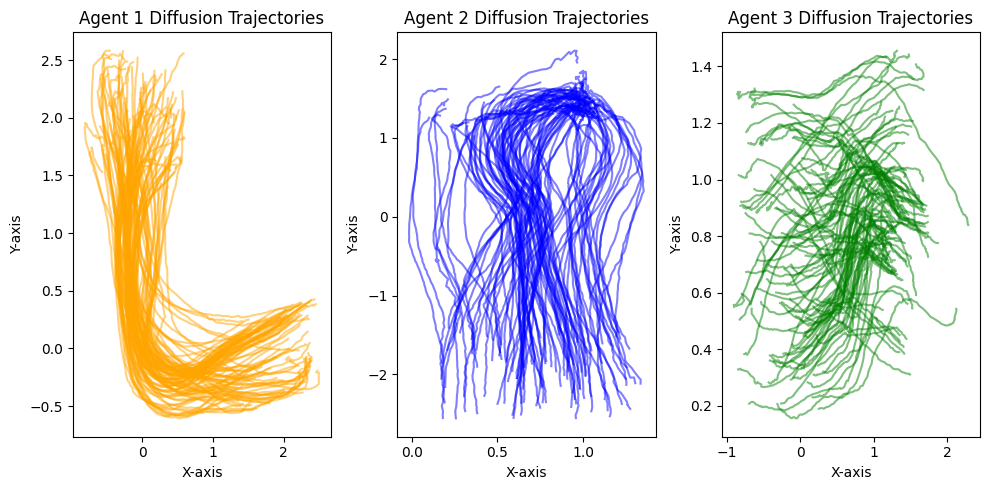

In [5]:
# Plotting diffusion trajectories

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Agent 1 Diffusion Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# for trajectory in mlp_gnn_data1:
#     plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
for trajectory in ours1:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
# plt.scatter(x1, y1, color='red', label='First Trajectory')

plt.subplot(1, 3, 2)
plt.title("Agent 2 Diffusion Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# for trajectory in mlp_gnn_data2:
#     plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
for trajectory in ours2:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='blue')
# plt.scatter(x2, y2, color='red', label='First Trajectory')

plt.subplot(1, 3, 3)
plt.title("Agent 3 Diffusion Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
for trajectory in ours3:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='green')

plt.tight_layout()

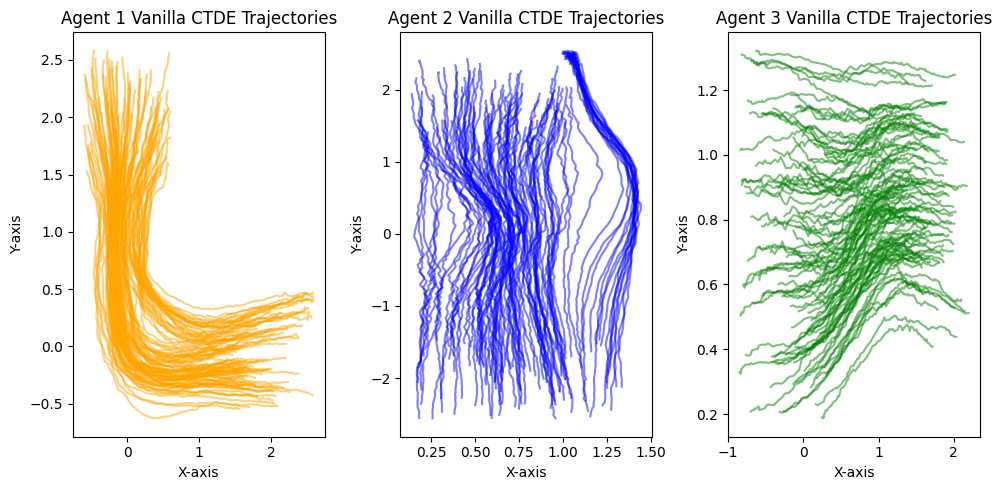

In [6]:
# Plotting vanilla CTDE trajectories

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Agent 1 Vanilla CTDE Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

for trajectory in vanilla1:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')

plt.subplot(1, 3, 2)
plt.title("Agent 2 Vanilla CTDE Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
for trajectory in vanilla2:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='blue')

plt.subplot(1, 3, 3)
plt.title("Agent 3 Vanilla CTDE Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
for trajectory in vanilla3:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='green')

plt.tight_layout()

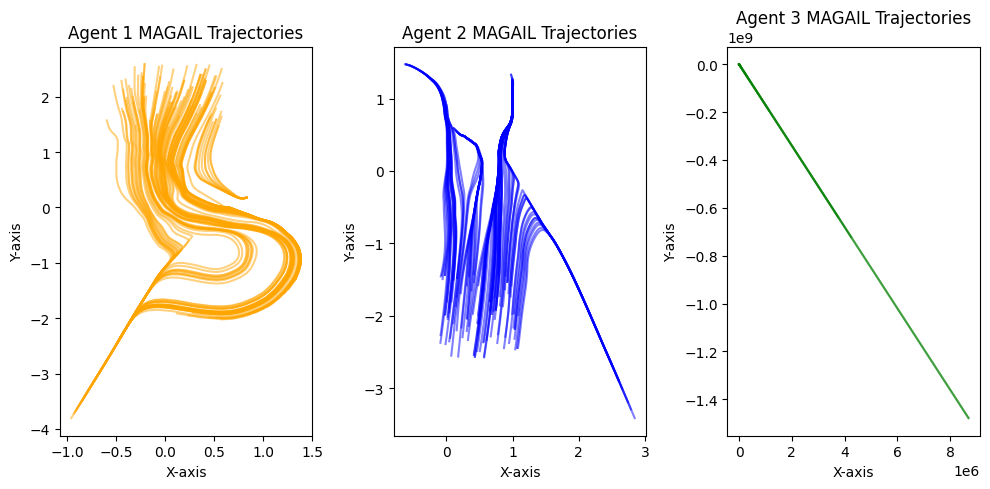

In [7]:
# Plotting magail trajectories

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Agent 1 MAGAIL Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# for trajectory in mlp_gnn_data1:
#     plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
for trajectory in magail_vary_init1:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
# plt.scatter(x1, y1, color='red', label='First Trajectory')

plt.subplot(1, 3, 2)
plt.title("Agent 2 MAGAIL Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# for trajectory in mlp_gnn_data2:
#     plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
for trajectory in magail_vary_init2:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='blue')
# plt.scatter(x2, y2, color='red', label='First Trajectory')

plt.subplot(1, 3, 3)
plt.title("Agent 3 MAGAIL Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
for trajectory in magail_vary_init3:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='green')

plt.tight_layout()

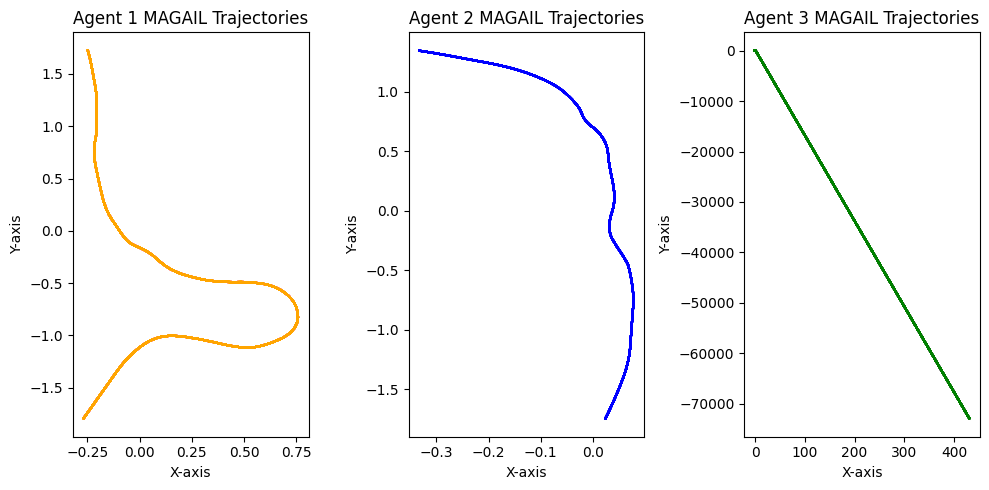

In [8]:
# Plotting magail trajectories

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Agent 1 MAGAIL Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# for trajectory in mlp_gnn_data1:
#     plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
for trajectory in magail_static_init1:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
# plt.scatter(x1, y1, color='red', label='First Trajectory')

plt.subplot(1, 3, 2)
plt.title("Agent 2 MAGAIL Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# for trajectory in mlp_gnn_data2:
#     plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
for trajectory in magail_static_init2:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='blue')
# plt.scatter(x2, y2, color='red', label='First Trajectory')

plt.subplot(1, 3, 3)
plt.title("Agent 3 MAGAIL Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
for trajectory in magail_static_init3:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='green')

plt.tight_layout()

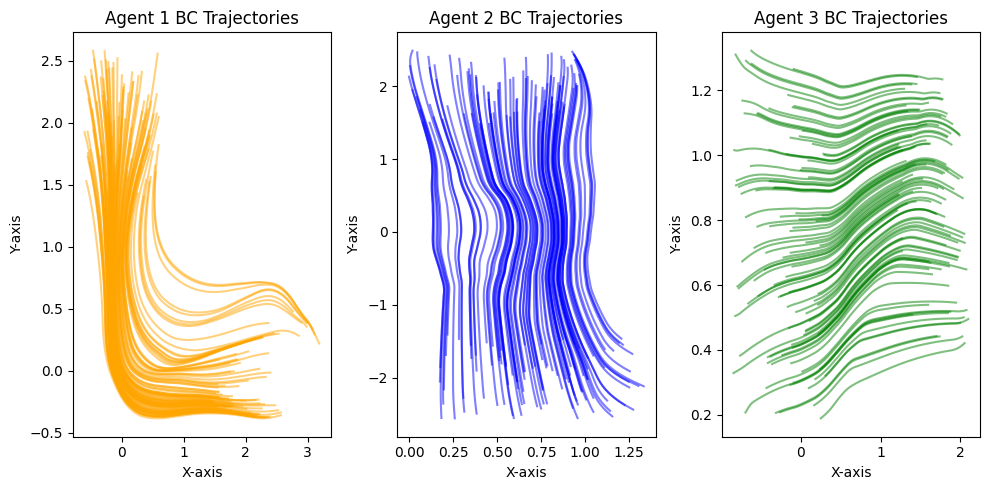

In [9]:
# Plotting bc trajectories

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Agent 1 BC Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# for trajectory in mlp_gnn_data1:
#     plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
for trajectory in bc1:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
# plt.scatter(x1, y1, color='red', label='First Trajectory')

plt.subplot(1, 3, 2)
plt.title("Agent 2 BC Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# for trajectory in mlp_gnn_data2:
#     plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
for trajectory in bc2:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='blue')
# plt.scatter(x2, y2, color='red', label='First Trajectory')

plt.subplot(1, 3, 3)
plt.title("Agent 3 BC Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
for trajectory in bc3:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='green')

plt.tight_layout()

In [10]:
fast_frechet = FastDiscreteFrechetMatrix(euclidean)
n = n_traj
w = np.ones(n) / n

# pack your expert & model trajectories into lists
expert = [expert_data1, expert_data2, expert_data3]
models = {
    "ours":       [ours1,       ours2,       ours3],
    "vanilla":    [vanilla1,    vanilla2,    vanilla3],
    "magail_var": [magail_vary_init1, magail_vary_init2, magail_vary_init3],
    "magail_stat":[magail_static_init1, magail_static_init2, magail_static_init3],
    "bc":         [bc1,         bc2,         bc3],
}

for name, trajs in models.items():
    for agent_idx in range(3):
        D = np.zeros((n, n))
        A_exp = expert[agent_idx]
        A_mod =  trajs[agent_idx]
        for i in range(n):
            for j in range(n):
                D[i,j] = fast_frechet.distance(A_exp[i], A_mod[j])
        ot_dist = ot.emd2(w, w, D)
        print(f"OT({name}) Agent-{agent_idx+1}: {ot_dist:.4f}")

OT(ours) Agent-1: 0.3556
OT(ours) Agent-2: 0.6660
OT(ours) Agent-3: 0.4140
OT(vanilla) Agent-1: 0.3941
OT(vanilla) Agent-2: 0.4697
OT(vanilla) Agent-3: 0.3253
OT(magail_var) Agent-1: 2.5925
OT(magail_var) Agent-2: 1.5130
OT(magail_var) Agent-3: 46749706.9432
OT(magail_stat) Agent-1: 2.8438
OT(magail_stat) Agent-2: 1.1466
OT(magail_stat) Agent-3: 72911.8891
OT(bc) Agent-1: 0.4384
OT(bc) Agent-2: 0.4371
OT(bc) Agent-3: 0.3548
